In [35]:
import mne
import PyQt5
import matplotlib.pyplot as plt
import numpy as np
plt.switch_backend("Qt5Agg")
from mne.time_frequency import stft

In [ ]:
%matplotlib inline

In [138]:
raw_fname = 'Lutfullin/LowConc/170928_0006_EEG-2.edf'
raw = mne.io.read_raw_edf(raw_fname, preload=True)
raw.filter(1, 45, n_jobs=1, l_trans_bandwidth="auto", h_trans_bandwidth="auto",
           filter_length='auto', phase='zero-double')

Extracting edf Parameters from Lutfullin/LowConc/170928_0006_EEG-2.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 125249  =      0.000 ...   500.996 secs...
Ready.
Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 1650 samples (6.600 sec) selected


<RawEDF  |  170928_0006_EEG-2.edf, n_channels x n_times : 19 x 125250 (501.0 sec), ~18.2 MB, data loaded>

In [139]:
raw.info

<Info | 16 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'float | 1.0
    ch_names : 'list | EEG Fp1-Cz, EEG Fp2-Cz, EEG F7-Cz, EEG F3-Cz, EEG Fz-Cz, ...
    chs : 'list | 19 items (EEG: 18, MISC: 1)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    highpass : 'float | 1.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 45.0 Hz
    meas_date : 'int | 1506600490
    nchan : 'int | 19
    projs : 'list | 0 items
    sfreq : 'float | 250.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    file_id : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    meas_id : 'NoneType
    proj_id : 'NoneType
    proj_name : 'NoneType
    subject_info : 'NoneTy

In [128]:
raw.ch_names

['EEG Fp1-Cz',
 'EEG Fp2-Cz',
 'EEG F7-Cz',
 'EEG F3-Cz',
 'EEG Fz-Cz',
 'EEG F4-Cz',
 'EEG F8-Cz',
 'EEG T3-Cz',
 'EEG C3-Cz',
 'EEG T4-Cz',
 'EEG T5-Cz',
 'EEG P3-Cz',
 'EEG Pz-Cz',
 'EEG P4-Cz',
 'EEG T6-Cz',
 'EEG O1-Cz',
 'EEG O2-Cz',
 'event',
 'STI 014']

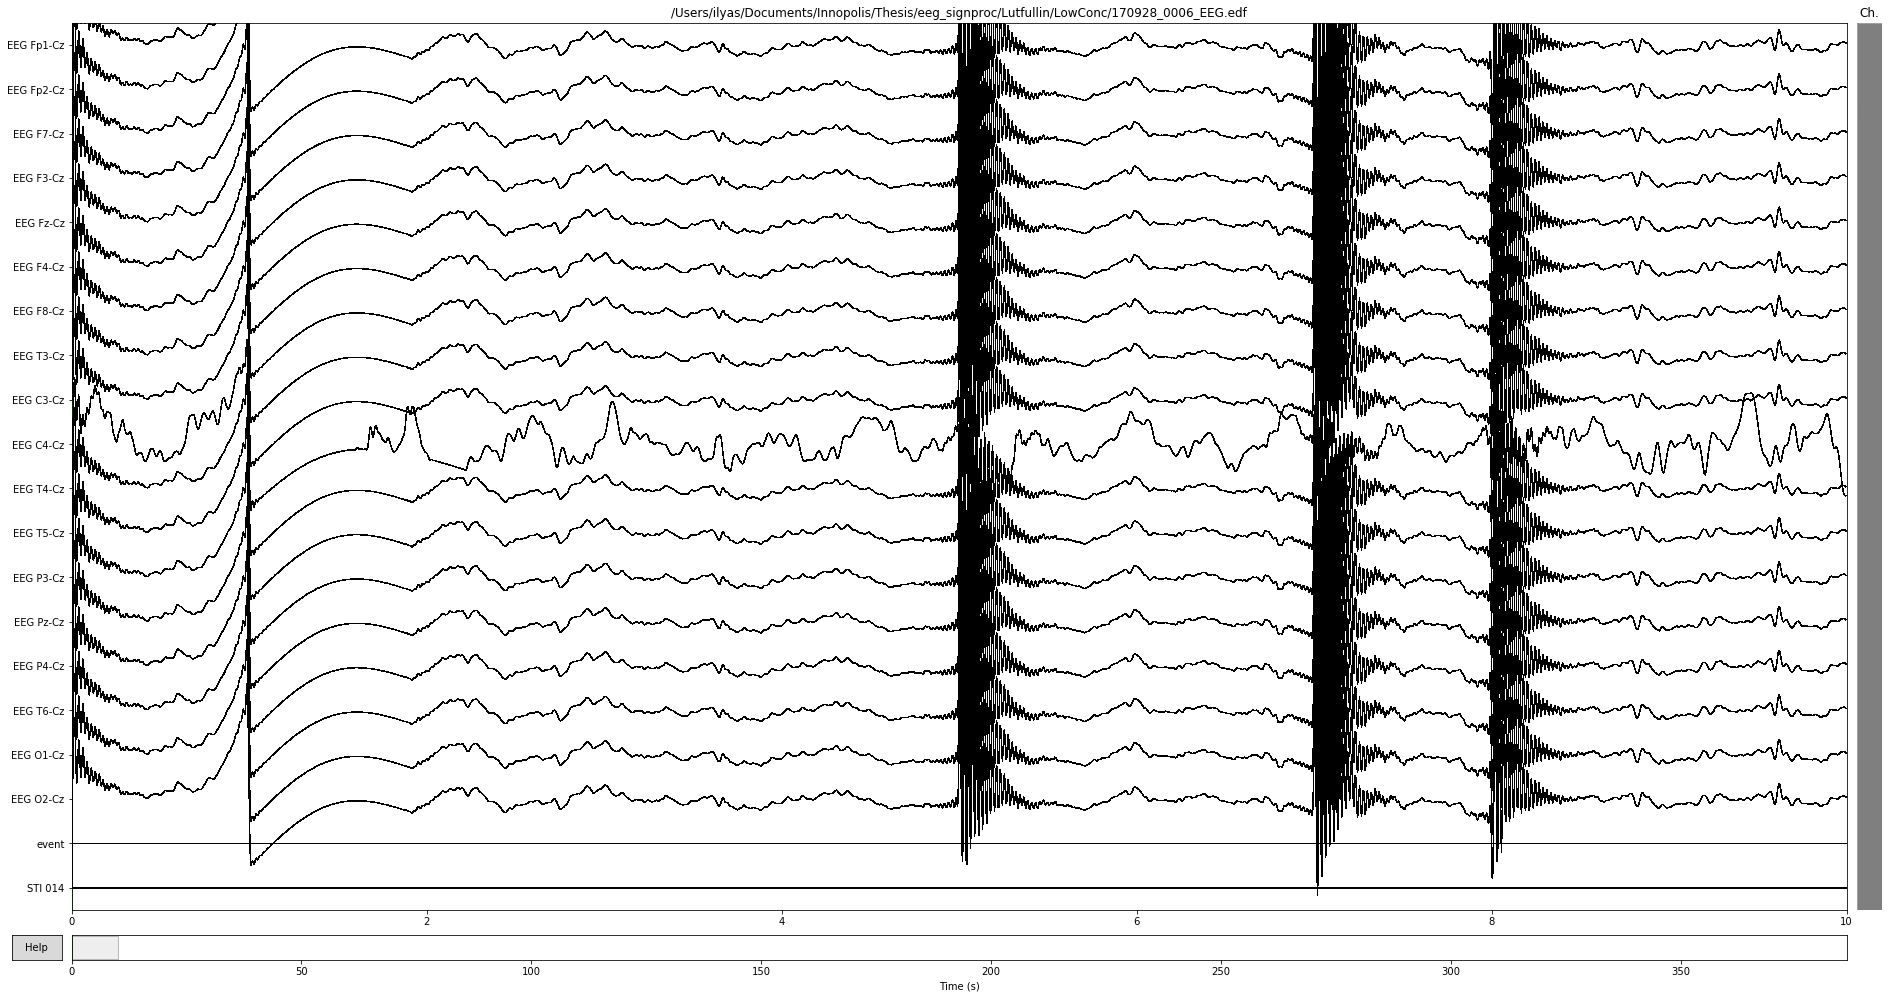

In [91]:
raw.plot(block=True)

In [140]:
from mne.time_frequency import stft
exclude_list=['event','STI 014','EEG C4-Cz']
filtered_channels = raw.copy().pick_types(meg=False, eeg=True, exclude=exclude_list)
sfreq = raw.info['sfreq']
data, times = filtered_channels[:, int(sfreq * 0):]

In [141]:
fft = stft(data,wsize=248)

Number of frequencies: 125
Number of time steps: 1011


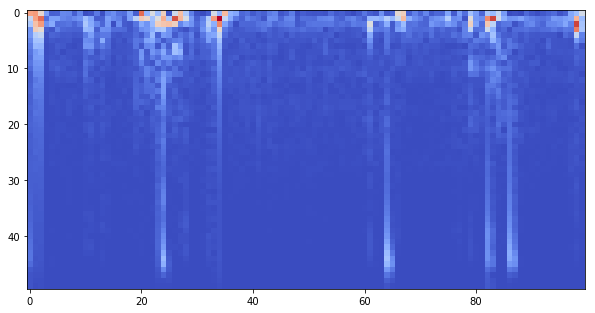

In [152]:
nfft = fft[0,:,:]
nfft = np.absolute(nfft)
fft = np.absolute(fft)
f1 = plt.figure(figsize=(10,10))
#print(nfft.shape)
for_plt = nfft
plt.imshow(for_plt[:50,:100],cmap="coolwarm")

In [143]:
delta_st = 0
theta_st = 4
alpha_st = 8
alpha_fin = 14
beta_st = 16
gamma_st = 31
gamma_fin = 50

In [144]:
feat_vec2 = np.array([np.sum(fft[:,delta_st:theta_st,:],axis=1),np.sum(fft[:,theta_st:alpha_st,:],axis=1),np.sum(fft[:,alpha_st:alpha_fin,:],axis=1),np.sum(fft[:,beta_st:gamma_st,:],axis=1),np.sum(fft[:,gamma_st:gamma_fin,:],axis=1)])

In [145]:
feat_vec2.shape

(5, 17, 1011)

In [146]:
import pandas as pd
from pandas import DataFrame
data_2d = np.array(np.squeeze(feat_vec2[:,0,:]), dtype=float)
resulted_data = DataFrame(data_2d.T, columns=['delta', 'theta', 'alpha', 'beta', 'gamma'])
for i in range(1, feat_vec2.shape[1]):
    data_2d = np.squeeze(feat_vec2[:,i,:])
    df = DataFrame(data_2d.T, columns=['delta', 'theta', 'alpha', 'beta', 'gamma'])
    resulted_data = pd.concat([resulted_data,df],ignore_index=True)

In [147]:
resulted_data.to_csv("low_conc_feat-2.csv", sep=",",index=False)

In [148]:
resulted_data.shape

(17187, 5)